In [2]:
import irtk
from irtk.scene import *
from irtk.renderer import Renderer
from irtk.io import write_image

from IPython.display import Image, display
from pathlib import Path 
import math

from custom_scene_components import MyPerspectiveCamera

data_path = Path('../data')

In [3]:
fov = 40
fx = 0.5 / math.tan(math.radians(fov / 2))
fy = fx
cx = 0.5
cy = 0.5

scene = Scene()
scene.set('armadillo', Mesh.from_file(data_path / 'meshes' / 'armadillo.obj', mat_id='blue'))
scene.set('blue', DiffuseBRDF((0.2, 0.2, 0.9)))
scene.set('envlight', EnvironmentLight.from_file(data_path / 'envmaps' / 'factory.exr'))
scene.set('sensor', MyPerspectiveCamera.from_lookat(fx=fx, fy=fx, cx=0.5, cy=0.5, origin=(1.5, 0, 1.5), target=(0, 0, 0), up=(0, 1, 0)))
scene.set('film', HDRFilm(width=512, height=512))
scene.set('integrator', Integrator(type='path', config={
    'max_depth': 1,
    'hide_emitters': False
}))
print(scene)

armadillo:
----
v:
	description: mesh vertex positions
	is differentiable: True
	requires grad: False
	value: 	tensor([[ 0.0414, -0.1924, -0.1188],
        [ 0.0353, -0.1864, -0.1199],
        [ 0.0409, -0.1873, -0.1259],
        ...,
        [-0.4123,  0.3096,  0.2094],
        [-0.4167,  0.2992,  0.2206],
        [-0.4152,  0.3048,  0.2151]], device='cuda:0')
f:
	description: mesh face indices
	is differentiable: False
	value: 	tensor([[    0,     1,     2],
        [    0,     3,     1],
        [    1,     4,     2],
        ...,
        [26444, 26442, 26441],
        [26444, 26436, 26442],
        [26444, 26443, 26437]], device='cuda:0', dtype=torch.int32)
uv:
	description: mesh uv coordinates
	is differentiable: False
	value: 	tensor([[0.0864, 0.8973],
        [0.0831, 0.8967],
        [0.0862, 0.8928],
        ...,
        [0.7044, 0.8980],
        [0.6640, 0.9172],
        [0.8925, 0.3547]], device='cuda:0')
fuv:
	description: mesh uv face indices
	is differentiable: False
	val

In [4]:
print(irtk.get_connector_list())

['psdr_jit']


In [5]:
render = Renderer('psdr_jit', render_options={
    'spp': 128,
    'sppe': 0,
    'sppse': 0,
    'log_level': 0,
    'npass': 1
})
image = render(scene)[0]

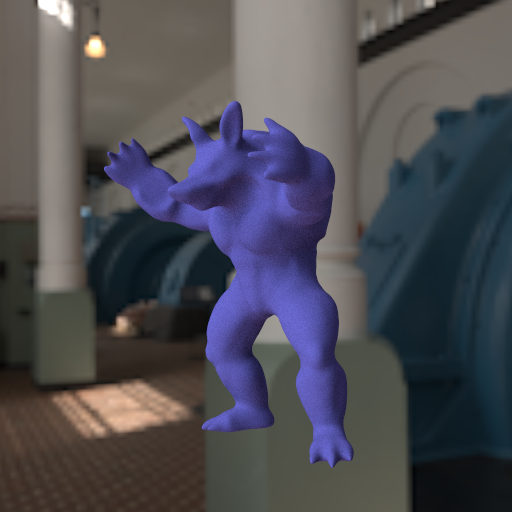

In [6]:
write_image('armadillo.png', image)
display(Image('armadillo.png'))